<a href="https://colab.research.google.com/github/WanyaKruk/DZ-5/blob/main/DZ_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#  DZ-5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data = pd.read_csv('CO2 Emissions_Canada.csv')
print(data)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [40]:
 """
 Подробное описание датасета: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles?resource=download

     Количество выбросов CO2 транспортным средством в зависимости от его различных характеристик.
Этот набор данных фиксирует детали того, как выбросы CO2 транспортным средством могут меняться в зависимости от различных характеристик.
Набор данных был взят с официального сайта открытых данных правительства Канады. Содержит данные за 7 лет.

  Состав Датасета:
Количество Образцов: 7385
Количество Признаков: 11 (6 - числовых, 5 - категориальных)
Целевая Переменная: Выбросы CO2 (CO2 Emissions(g/km))

  Описание колонок:
MAKE: Производитель автомобиля.
MODEL: Модель автомобиля.
VEHICLE CLASS: Класс автомобиля.
ENGINE SIZE: Объем двигателя в литрах.
CYLINDERS: Количество цилиндров в двигателе.
TRANSMISSION: Тип трансмиссии.
FUEL TYPE: Тип топлива.
FUEL CONSUMPTION (CITY): Расход топлива в городе (литров на 100 км).
FUEL CONSUMPTION (HWY): Расход топлива на шоссе (литров на 100 км).
FUEL CONSUMPTION (COMB): Комбинированный расход топлива (литров на 100 км и миль на 1 галлон).
CO2 EMISSIONS: Выбросы CO2 (грамм на километр) - целевая переменная, которую мы пытаемся предсказать.

  Аббревиатуры, используемые в датасете:
MODEL
4WD/4X4 = Полный привод
AWD = Полный привод
FFV = Гибкотопливный автомобиль
SWB = Короткая колесная база
LWB = Длинная колесная база
EWB = Удлиненная колесная база
TRANSMISSION
A = Автоматическая
AM = Автоматизированная ручная
AS = Автоматическая с выбором переключения передач
AV = Бесступенчатая
M = Механическая
3 - 10 = Количество передач
FUEL TYPE
X = Обычный бензин
Z = Премиальный бензин
D = Дизельное топливо
E = Этанол (E85)
N = Природный газ

 """

'\nПодробное описание датасета: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles?resource=download\n\n    Количество выбросов CO2 транспортным средством в зависимости от его различных характеристик.\nЭтот набор данных фиксирует детали того, как выбросы CO2 транспортным средством могут меняться в зависимости от различных характеристик.\nНабор данных был взят с официального сайта открытых данных правительства Канады. Содержит данные за 7 лет.\n\n Состав Датасета:\nКоличество Образцов: 7385\nКоличество Признаков: 11 (6 - числовых, 5 - категориальных)\nЦелевая Переменная: Выбросы CO2 (CO2 Emissions(g/km))\n\n Описание колонок:\nMAKE: Производитель автомобиля.\nMODEL: Модель автомобиля.\nVEHICLE CLASS: Класс автомобиля.\nENGINE SIZE: Объем двигателя в литрах.\nCYLINDERS: Количество цилиндров в двигателе.\nTRANSMISSION: Тип трансмиссии.\nFUEL TYPE: Тип топлива.\nFUEL CONSUMPTION (CITY): Расход топлива в городе (литров на 100 км).\nFUEL CONSUMPTION (HWY): Расход топлив

In [41]:
print(data.isnull().sum())    # Проверим на пустые значения

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [42]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [43]:
data.dtypes    # Посмотрим на типы данных вдатасете

,0
Make,object
Model,object
Vehicle Class,object
Engine Size(L),float64
Cylinders,int64
Transmission,object
Fuel Type,object
Fuel Consumption City (L/100 km),float64
Fuel Consumption Hwy (L/100 km),float64
Fuel Consumption Comb (L/100 km),float64


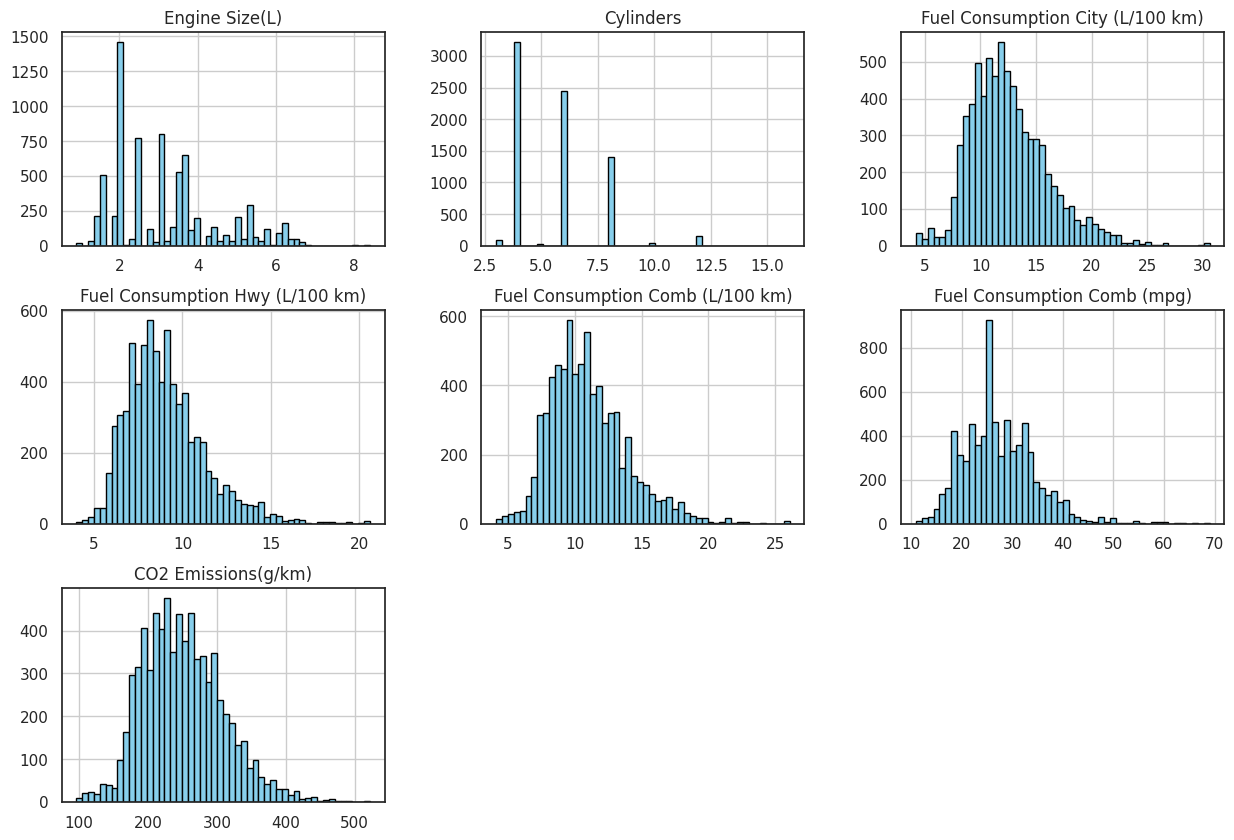

In [44]:
# Визуализация

data.hist(bins=50, figsize=(15, 10), color='skyblue', edgecolor='black')    # Построим гистограммы
plt.show()

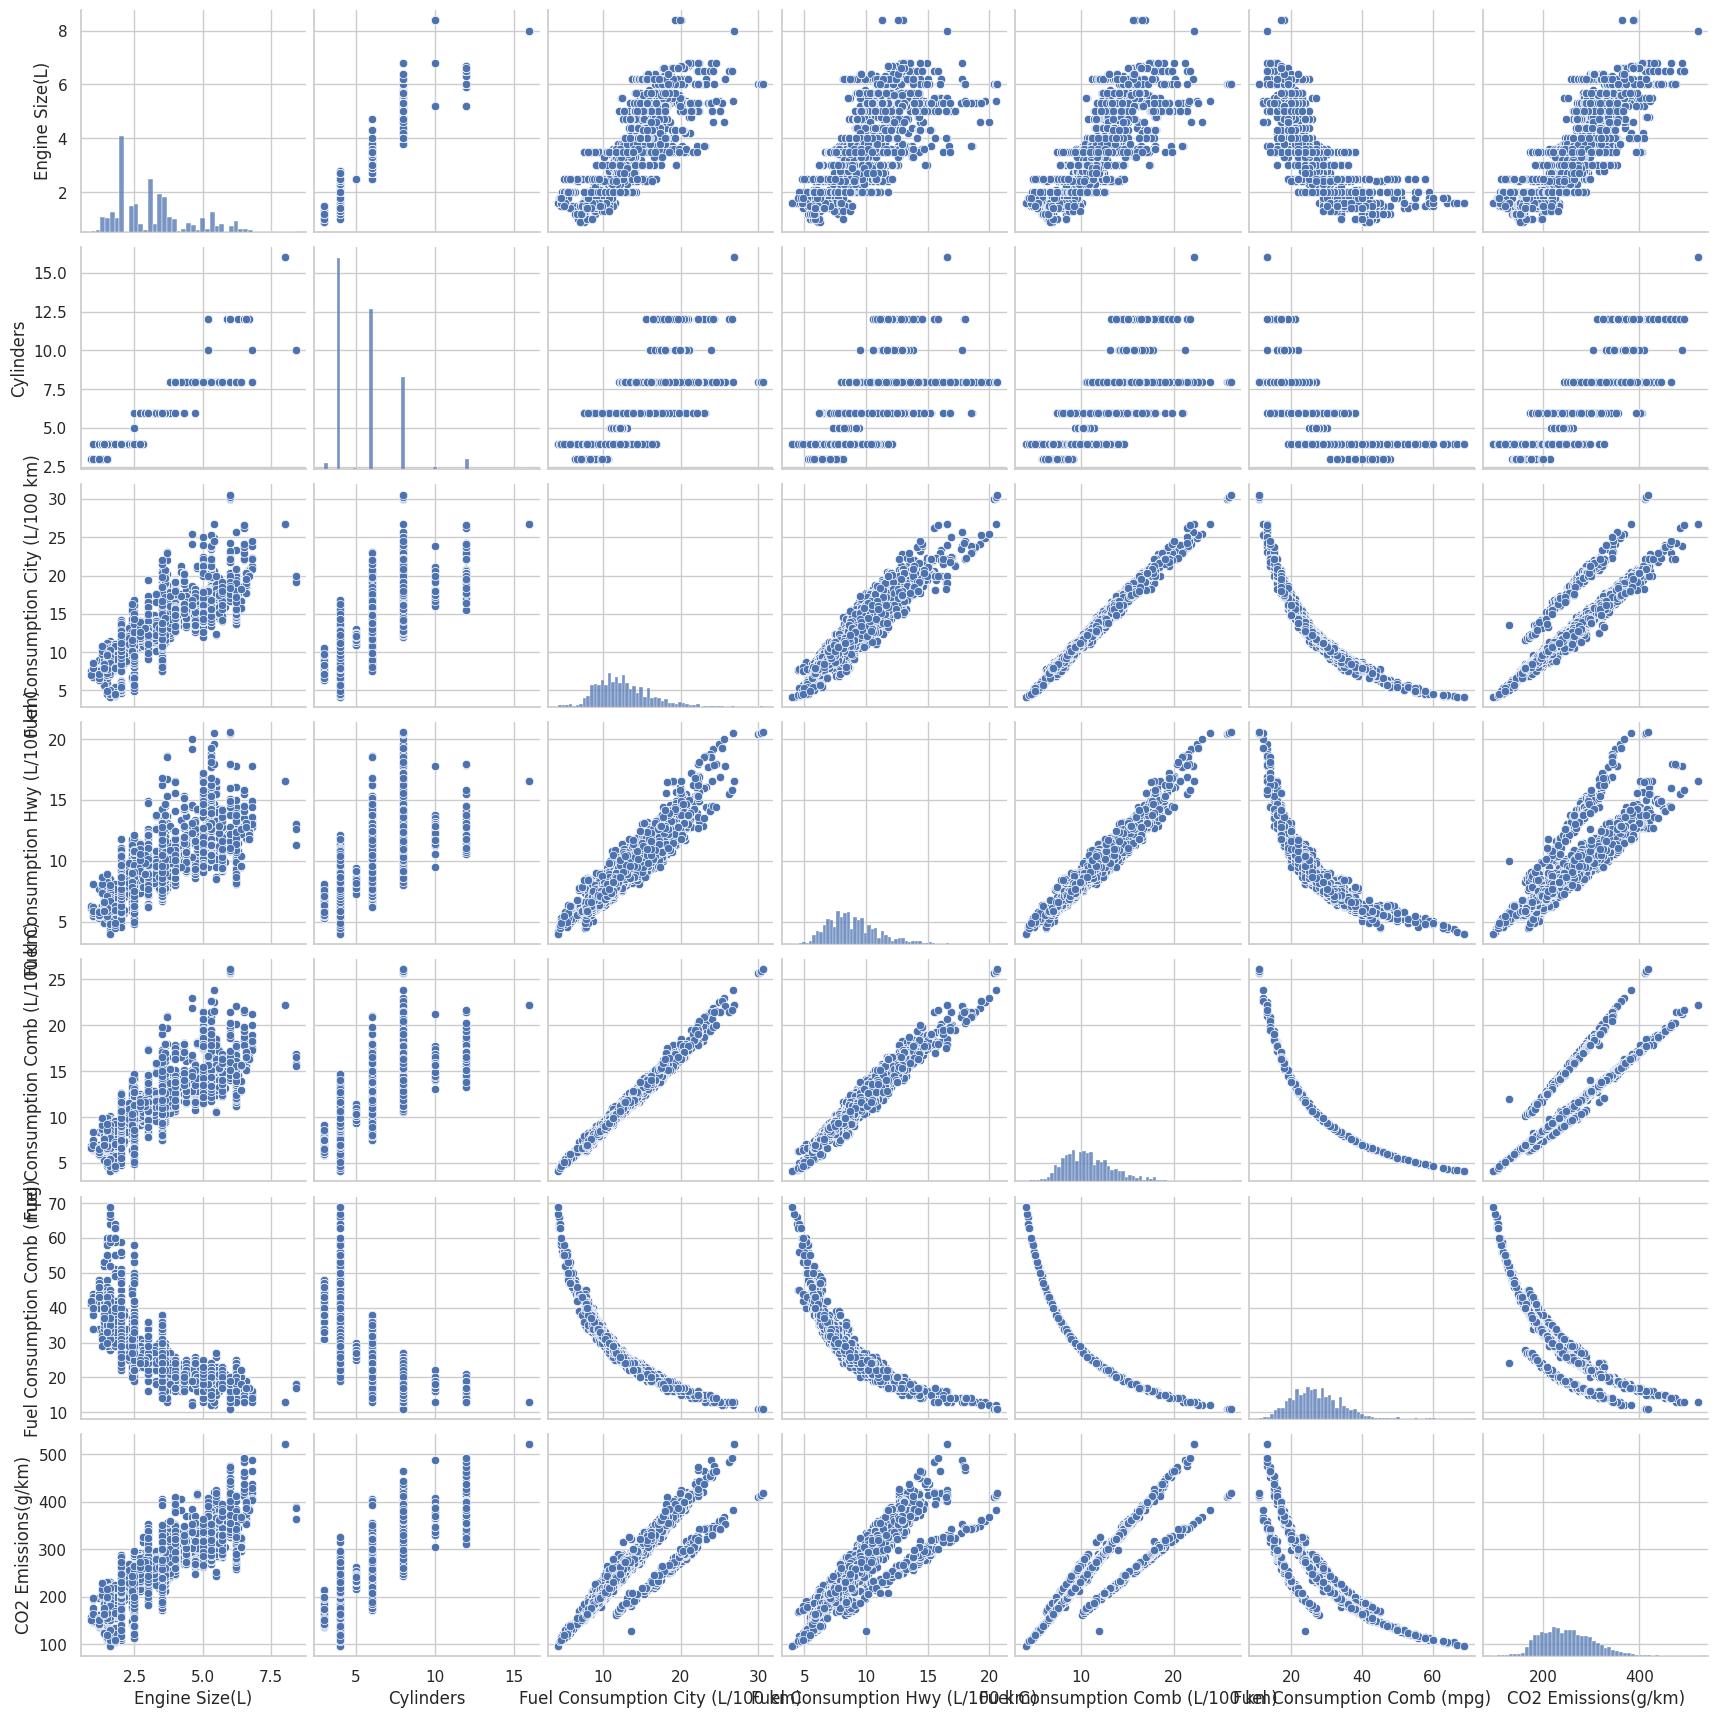

In [45]:
# Парные диаграммы рассеяния
import seaborn as sns

sns.set(style="whitegrid")
sns.pairplot(data)
plt.show()

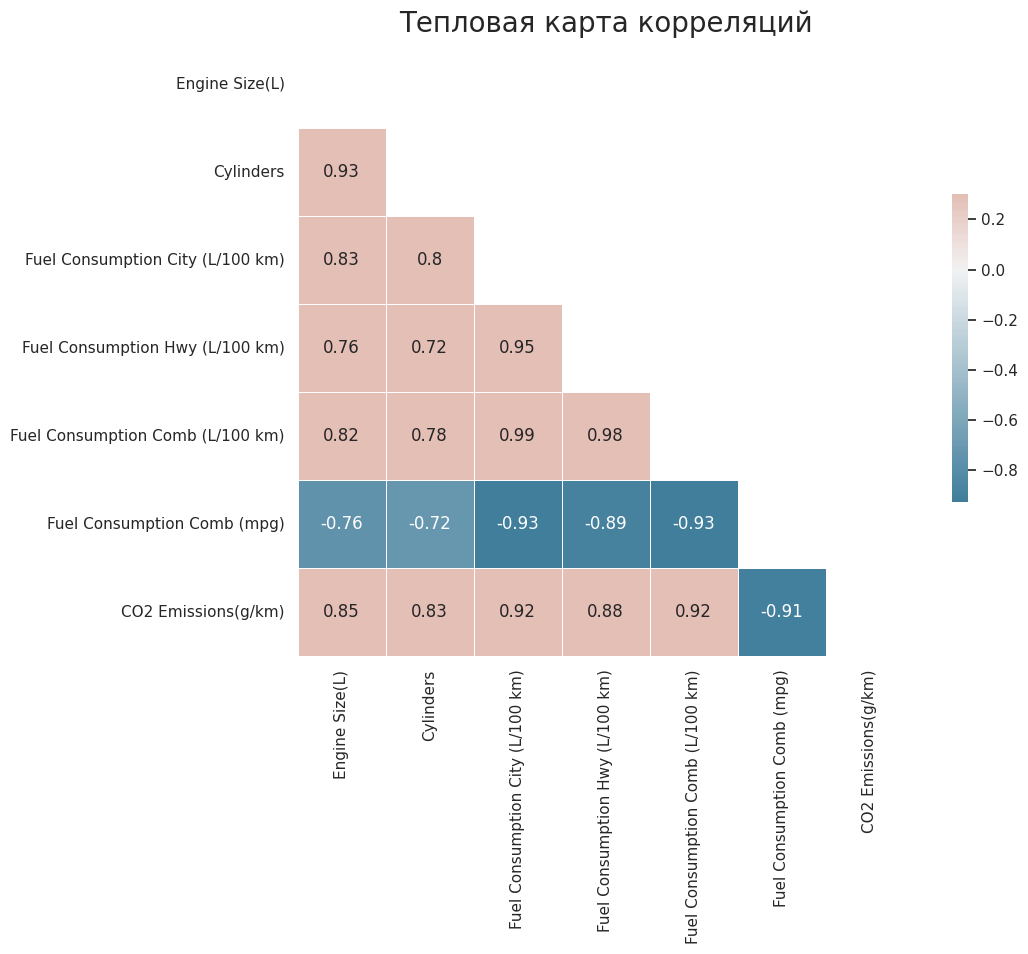

In [46]:
  # Расчет корреляционной матрицы
  sns.set(style="white")

numeric_df = data.select_dtypes(include=[np.number])  # Оставляем только числовые столбцы
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))    # отброзимтолько нижний треугольник
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Тепловая карта корреляций', fontsize=20)
plt.show()

In [47]:
"Стало интересновлияние объема двигателя на выбросы - неужели так слабо? Хм...)"

'Стало интересновлияние объема двигателя на выбросы - неужели так слабо? Хм...)'

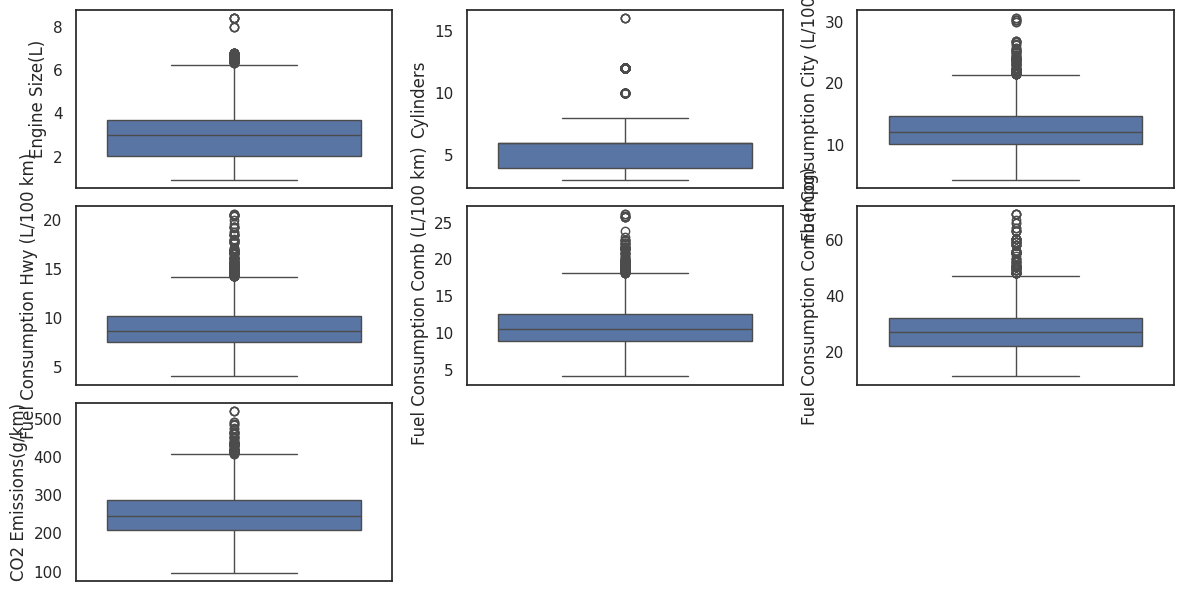

In [48]:
#  Ящики с усами для каждого числового столбца
plt.figure(figsize=(12, 10))

for index, column in enumerate(data.select_dtypes(include=[np.number]).columns):
    plt.subplot((len(data.columns) // 3) + 1, 3, index + 1)
    sns.boxplot(y=data[column])

plt.tight_layout()
plt.show()


In [49]:
# Проводим предварительную обработку данных
from sklearn.preprocessing import StandardScaler, LabelEncoder

cat_features = ['Fuel Type', 'Vehicle Class', 'Transmission']
num_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
# Преобразуем категориальные признаки в числовые
label_encoders = {}
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le
    print(f'метки для {feature}: {dict(enumerate (le.classes_))}')
data.drop_duplicates() # дубликаты -
data

метки для Fuel Type: {0: 'D', 1: 'E', 2: 'N', 3: 'X', 4: 'Z'}
метки для Vehicle Class: {0: 'COMPACT', 1: 'FULL-SIZE', 2: 'MID-SIZE', 3: 'MINICOMPACT', 4: 'MINIVAN', 5: 'PICKUP TRUCK - SMALL', 6: 'PICKUP TRUCK - STANDARD', 7: 'SPECIAL PURPOSE VEHICLE', 8: 'STATION WAGON - MID-SIZE', 9: 'STATION WAGON - SMALL', 10: 'SUBCOMPACT', 11: 'SUV - SMALL', 12: 'SUV - STANDARD', 13: 'TWO-SEATER', 14: 'VAN - CARGO', 15: 'VAN - PASSENGER'}
метки для Transmission: {0: 'A10', 1: 'A4', 2: 'A5', 3: 'A6', 4: 'A7', 5: 'A8', 6: 'A9', 7: 'AM5', 8: 'AM6', 9: 'AM7', 10: 'AM8', 11: 'AM9', 12: 'AS10', 13: 'AS4', 14: 'AS5', 15: 'AS6', 16: 'AS7', 17: 'AS8', 18: 'AS9', 19: 'AV', 20: 'AV10', 21: 'AV6', 22: 'AV7', 23: 'AV8', 24: 'M5', 25: 'M6', 26: 'M7'}


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,ACURA,ILX,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,12,2.0,4,17,4,11.2,8.3,9.9,29,232


Linear Regression;
          MAE: 2.3708271607446663e-14
          MSE: 1.2659138581285286e-27
          R²: 1.0


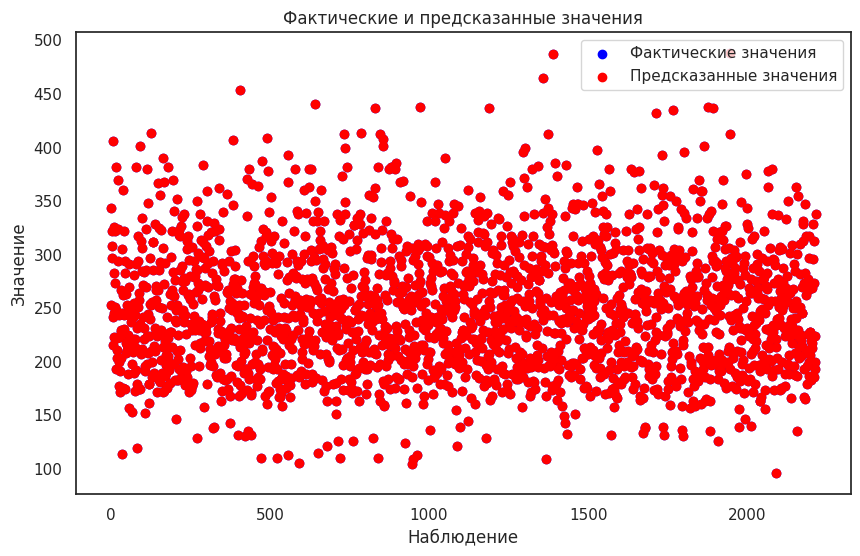

In [88]:
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb

X = data[num_features]
target = data['CO2 Emissions(g/km)']
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

# Линейная регрессия
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print('Linear Regression;')
print(f'          MAE: {mae}')
print(f'          MSE: {mse}')
print(f'          R²: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred_lr, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

Linear Regression;
          MAE: 2.4157628241919134e-14
          MSE: 1.3033074869298781e-27
          R²: 1.0


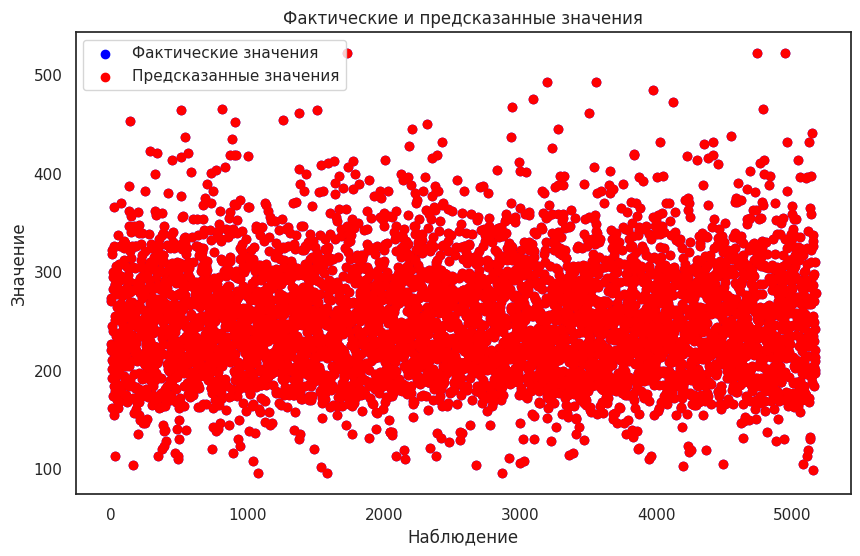

In [84]:
# Может переобучилась?
y_train_pred = model_lr.predict(X_train)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print('Linear Regression;')
print(f'          MAE: {mae}')
print(f'          MSE: {mse}')
print(f'          R²: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Фактические значения')
plt.scatter(range(len(y_train)), y_train_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

Bayesian Ridge Regression:
          MAE: 2.6635540944923316e-12
          MSE: 1.257314875559357e-23
          R²: 1.0


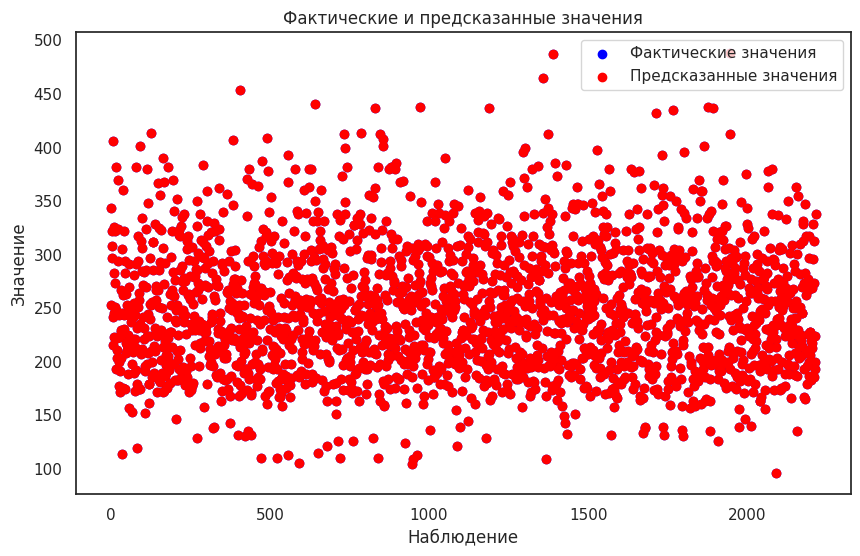

In [79]:
# Байесовская регрессия
model_br = BayesianRidge()
model_br.fit(X_train, y_train)
y_pred_br = model_br.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_br)
mse = mean_squared_error(y_test, y_pred_br)
r2 = r2_score(y_test, y_pred_br)
print('Bayesian Ridge Regression:')
print(f'          MAE: {mae}')
print(f'          MSE: {mse}')
print(f'          R²: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred_br, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

Ridge Regression;
          MAE: 6.720442867778121e-06
          MSE: 1.154508317470904e-10
          R²: 0.9999999999999658


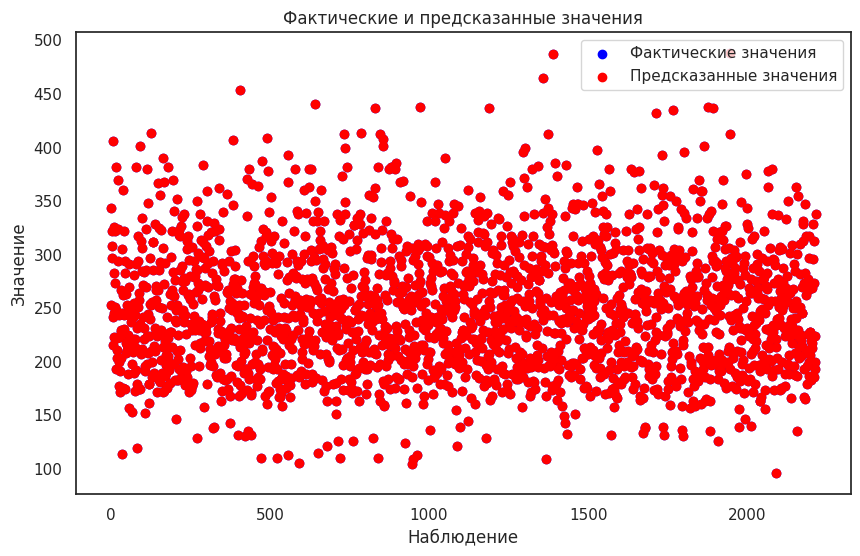

In [80]:
# Гребневая регрессия
model_rr = Ridge()
model_rr.fit(X_train, y_train)
y_pred_rr = model_rr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rr)
mse = mean_squared_error(y_test, y_pred_rr)
r2 = r2_score(y_test, y_pred_rr)
print('Ridge Regression;')
print(f'          MAE: {mae}')
print(f'          MSE: {mse}')
print(f'          R²: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred_rr, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

Extra Trees Regressor:
          MAE: 0.08859205776173219
          MSE: 0.27649296028880904
          R²: 0.9999181417807981


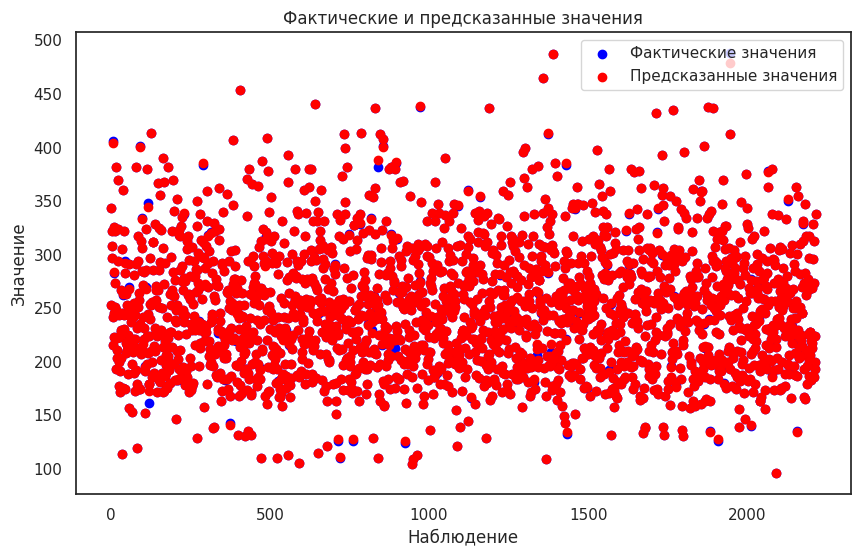

In [81]:
# Extra Trees
model_et = ExtraTreesRegressor(random_state=42)
model_et.fit(X_train, y_train)
y_pred_et = model_et.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_et)
mse = mean_squared_error(y_test, y_pred_et)
r2 = r2_score(y_test, y_pred_et)
print('Extra Trees Regressor:')
print(f'          MAE: {mae}')
print(f'          MSE: {mse}')
print(f'          R²: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred_et, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

Extra Trees Regressor:
          MAE: 0.16567897452344102
          MSE: 0.3192645165265394
          R²: 0.9999054670333862


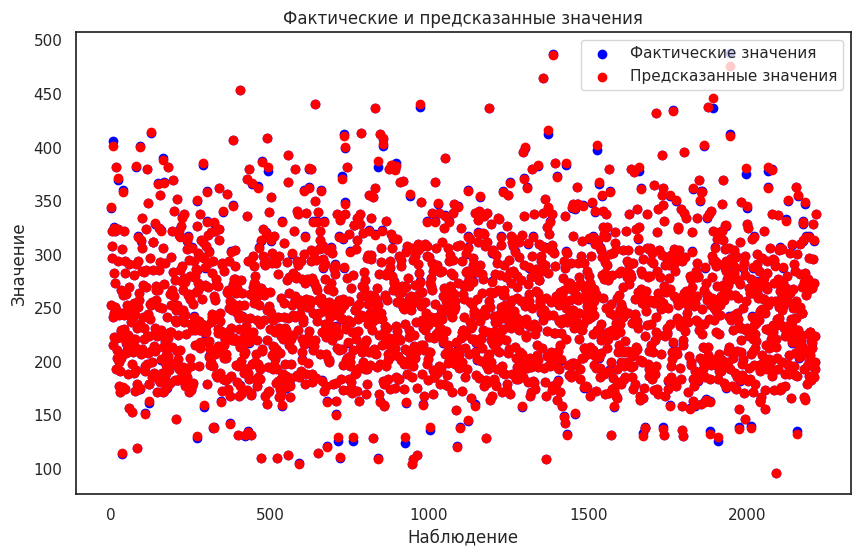

In [82]:
# Extreme Gradient Boosting
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
print('Extra Trees Regressor:')
print(f'          MAE: {mae}')
print(f'          MSE: {mse}')
print(f'          R²: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred_xgb, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()